In [23]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as pl
from IPython.core.display import HTML, display

In [18]:
% matplotlib inline

In [14]:
display(HTML("<style>.container {width: 90% !important}</style>"))

In [6]:
fd = '/accounts/ekarakoy/DATA/Beaching/CapeCodData/Tides/pickles/'
tfp = os.path.join(fd, 'Tide_Data.pickle');
sfp = os.path.join(fd, 'MS_Dates.pickle');
dfTides = pd.read_pickle(tfp)
dfMS = pd.read_pickle(sfp)

In [69]:
dfMS.Date.unique().shape

(162,)

In [70]:
dfMS.shape

(165, 1)

In [7]:
dfTides.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22583 entries, 1999-01-01 03:45:00 to 2014-12-31 19:26:00
Data columns (total 2 columns):
Pred        22583 non-null float64
High/Low    22583 non-null object
dtypes: float64(1), object(1)
memory usage: 529.3+ KB


In [8]:
dfTides.describe()

,Pred
count,22583.000000
mean,1.513077
std,1.448150
min,-0.630000
25%,0.110000
50%,2.250000
75%,2.920000
max,3.670000


In [10]:
dfTides['High/Low'].value_counts()

H    11292
L    11291
Name: High/Low, dtype: int64

In [11]:
dfTides.rename(columns={'High/Low': 'HiLo'}, inplace=True)

In [ ]:
dfTides.plot().line()

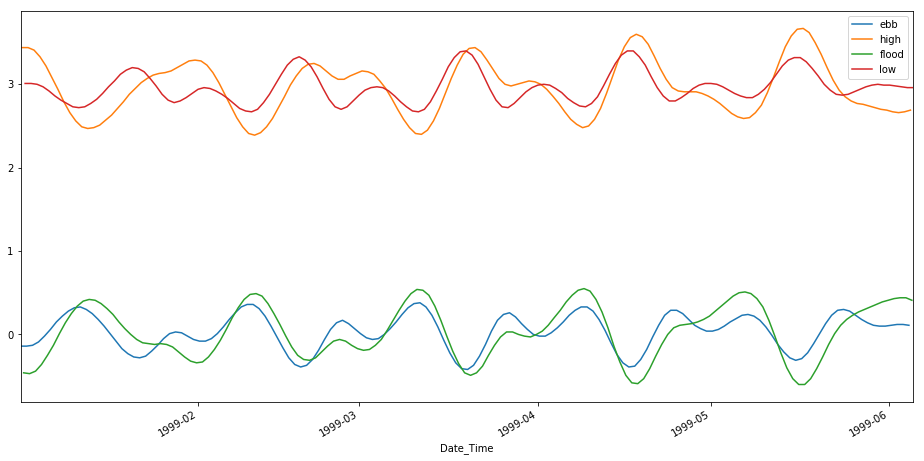

In [35]:
f, ax = pl.subplots(figsize=(16,8))
dfTides.iloc[:600:4, 0].plot(ax=ax, label='ebb')
dfTides.iloc[1:600:4, 0].plot(ax=ax, label='high')
dfTides.iloc[2:600:4, 0].plot(ax=ax, label='flood')
dfTides.iloc[3:600:4, 0].plot(ax=ax, label='low')
ax.legend()
#fTides.iloc[2:600:4#

In [58]:
dfTides['ampDiff'] = dfTides.Pred.diff()
dfTides['timeDiffHrs'] = dfTides.index.to_series().diff()

In [66]:
dfTides['vel'] = dfTides.ampDiff / (dfTides.timeDiffHrs.dt.seconds/3600)

In [79]:
dfTides['move'] = np.abs(dfTides.ampDiff)

In [80]:
dfTides.head()

,Pred,HiLo,ampDiff,timeDiffHrs,vel,move
Date_Time,,,,,,
1999-01-01 03:45:00,-0.14,L,NaN,NaT,NaN,NaN
1999-01-01 10:02:00,3.44,H,3.58,06:17:00,0.569761,3.58
1999-01-01 16:27:00,-0.46,L,-3.90,06:25:00,-0.607792,3.90
1999-01-01 22:42:00,3.01,H,3.47,06:15:00,0.555200,3.47
1999-01-02 04:39:00,-0.14,L,-3.15,05:57:00,-0.529412,3.15


In [83]:
dfTides.to_pickle('/accounts/ekarakoy/DEV-ALL/beaching/PklJar/dftides.pkl')

In [81]:
dfTidesDaily = pd.DataFrame((dfTides.resample('D').agg({'move': np.max,'Pred':np.max}), columns=['maxMovt', 'maxAmp'])

In [43]:
dfHighest = dfTides.Pred.resample('D').max()
dfLowest = dfTides.Pred.resample('D').min()

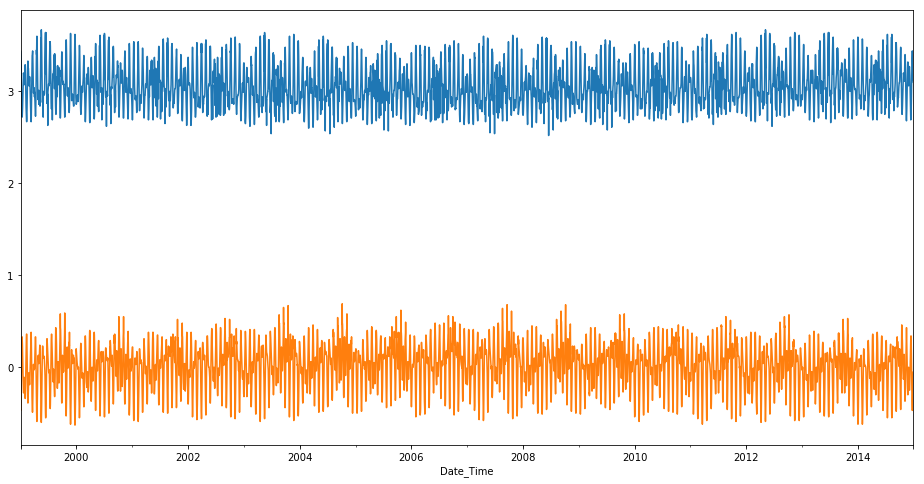

In [44]:
f, ax = pl.subplots(figsize=(16, 8))
dfHighest.plot(ax=ax, label='highest')
dfLowest.plot(ax=ax, label='lowest')

In [ ]:
dfTides.loc[dfTides.HiLo=='L', 'Index'] = dfTides.loc[dfTides.HiLo=='L', 'Pred'] - dfTides.loc[dfTides.Hilo=='L']